# Removing duplicates from SwiftDS-Stripe82

We have produced a catalog using the Swift DeepSky pipeline, where all Swift observations inside the Stripe82 were used.

Let's now filter the duplicated entries and have a look on it.

In [1]:
# swift_file = 'table_countrates_stripe82_all_swift_pointings.csv'

swift_file = 'table_countrates_detections_stripe82.csv'

In [12]:
import pandas as pd

df = pd.read_csv(swift_file, sep=';')

In [13]:
df.head()

,RA,DEC,countrates_0.3-10keV(ph.s-1),countrates_error_0.3-10keV(ph.s-1),exposure_time(s),countrates_0.3-1keV(ph.s-1),countrates_error_0.3-1keV(ph.s-1),upper_limit_0.3-1keV(ph.s-1),countrates_1-2keV(ph.s-1),countrates_error_1-2keV(ph.s-1),upper_limit_1-2keV(ph.s-1),countrates_2-10keV(ph.s-1),countrates_error_2-10keV(ph.s-1),upper_limit_2-10keV(ph.s-1)
0,00:56:24.480,-01:16:38.317,0.005645,0.0015,4572.8,0.000868,0.000600,-999.0,0.003040,0.001125,-999.0,0.001737,0.000853,-999.0
1,00:56:19.136,-01:14:58.198,0.004449,0.0014,4684.2,0.000494,0.000485,-999.0,0.001977,0.000959,-999.0,0.001977,0.000959,-999.0
2,00:56:23.004,-01:13:39.516,0.003901,0.0014,4649.6,0.000867,0.000679,-999.0,0.001301,0.000840,-999.0,0.001734,0.000969,-999.0
3,00:56:16.418,-01:14:05.418,0.005795,0.0016,4642.0,0.000446,0.000460,-999.0,0.002674,0.001100,-999.0,0.002674,0.001100,-999.0
4,00:56:16.922,-01:13:16.401,0.005224,0.0015,4587.3,0.002177,0.000937,-999.0,0.001306,0.000741,-999.0,0.001741,0.000853,-999.0


In [14]:
from astropy.coordinates import SkyCoord
from astropy import units

swift_coords = SkyCoord(df.RA, df.DEC, unit=(units.hourangle,units.degree))
df['RA'] = swift_coords.ra.deg
df['DEC'] = swift_coords.dec.deg
df.head()

,RA,DEC,countrates_0.3-10keV(ph.s-1),countrates_error_0.3-10keV(ph.s-1),exposure_time(s),countrates_0.3-1keV(ph.s-1),countrates_error_0.3-1keV(ph.s-1),upper_limit_0.3-1keV(ph.s-1),countrates_1-2keV(ph.s-1),countrates_error_1-2keV(ph.s-1),upper_limit_1-2keV(ph.s-1),countrates_2-10keV(ph.s-1),countrates_error_2-10keV(ph.s-1),upper_limit_2-10keV(ph.s-1)
0,14.102000,-1.277310,0.005645,0.0015,4572.8,0.000868,0.000600,-999.0,0.003040,0.001125,-999.0,0.001737,0.000853,-999.0
1,14.079733,-1.249499,0.004449,0.0014,4684.2,0.000494,0.000485,-999.0,0.001977,0.000959,-999.0,0.001977,0.000959,-999.0
2,14.095850,-1.227643,0.003901,0.0014,4649.6,0.000867,0.000679,-999.0,0.001301,0.000840,-999.0,0.001734,0.000969,-999.0
3,14.068408,-1.234838,0.005795,0.0016,4642.0,0.000446,0.000460,-999.0,0.002674,0.001100,-999.0,0.002674,0.001100,-999.0
4,14.070508,-1.221223,0.005224,0.0015,4587.3,0.002177,0.000937,-999.0,0.001306,0.000741,-999.0,0.001741,0.000853,-999.0


## xmatch using 'gc-filtering' algorithm

Let's remove the duplicates by matching the catalog with itself and the nearby matches should be removed according to their SNR.

### SNR column

Let's define the objects' overall SNR estimate to be the ratio between columns `countrates_0.3-10keV(ph.s-1)` and `countrates_error_0.3-10keV(ph.s-1)`, which are the countrate and error associated to the full band emission.

In [15]:
df['snr'] = df['countrates_0.3-10keV(ph.s-1)']/df['countrates_error_0.3-10keV(ph.s-1)']

**xmatch** needs columns 'ra','dec','id' to be defined. As well as the search radius.

In [16]:
df.reset_index(inplace=True)
df.rename(columns={'index':'ID'}, inplace=True)

In [17]:
df.head()

,ID,RA,DEC,countrates_0.3-10keV(ph.s-1),countrates_error_0.3-10keV(ph.s-1),exposure_time(s),countrates_0.3-1keV(ph.s-1),countrates_error_0.3-1keV(ph.s-1),upper_limit_0.3-1keV(ph.s-1),countrates_1-2keV(ph.s-1),countrates_error_1-2keV(ph.s-1),upper_limit_1-2keV(ph.s-1),countrates_2-10keV(ph.s-1),countrates_error_2-10keV(ph.s-1),upper_limit_2-10keV(ph.s-1),snr
0,0,14.102000,-1.277310,0.005645,0.0015,4572.8,0.000868,0.000600,-999.0,0.003040,0.001125,-999.0,0.001737,0.000853,-999.0,3.763333
1,1,14.079733,-1.249499,0.004449,0.0014,4684.2,0.000494,0.000485,-999.0,0.001977,0.000959,-999.0,0.001977,0.000959,-999.0,3.177857
2,2,14.095850,-1.227643,0.003901,0.0014,4649.6,0.000867,0.000679,-999.0,0.001301,0.000840,-999.0,0.001734,0.000969,-999.0,2.786429
3,3,14.068408,-1.234838,0.005795,0.0016,4642.0,0.000446,0.000460,-999.0,0.002674,0.001100,-999.0,0.002674,0.001100,-999.0,3.621875
4,4,14.070508,-1.221223,0.005224,0.0015,4587.3,0.002177,0.000937,-999.0,0.001306,0.000741,-999.0,0.001741,0.000853,-999.0,3.482667


In [18]:
from astropy.coordinates import Angle
radius = Angle(5, 'arcsec')

cols = {'ra':'RA', 'dec':'DEC', 'id':'ID'}

In [19]:
from xmatch import xmatch

help(xmatch)

Help on function xmatch in module xmatch.xmatchi:

xmatch(catalog_A, catalog_B, columns_A=None, columns_B=None, radius=None, separation_unit='arcsec', method='gc', parallel=False, nprocs=None, snr_column=None)
    Input:
     - catalog_A, catalog_B : ~pandas.DataFrame
             DFs containing (at least) the columns 'ra','dec','id'
     - columns_A, columns_B : dict mapping 'ra','dec','id' columns
            In case catalog(s) have different column names for 'ra','dec','id';
            e.g, {'ra':'RA', 'dec':'Dec', 'id':'ObjID'}
    
    Output:
     - matched_catalog : ~pandas.DataFrame



In [20]:
xcat = xmatch(df, df, columns_A=cols, columns_B=cols, radius=radius, snr_column='snr')

/home/chbrandt/.conda/envs/xmatch/lib/python3.6/site-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


AssertionError: 

In [ ]:
print(len(xcat))
xcat.head(20)

In [12]:
pcat = df.set_index('ID').loc[xcat[('B','ID')]]

In [13]:
print(len(pcat))
pcat.head(20)

2743


,RA,DEC,countrates_0.3-10keV(ph.s-1),countrates_error_0.3-10keV(ph.s-1),exposure_time(s),countrates_0.3-1keV(ph.s-1),countrates_error_0.3-1keV(ph.s-1),upper_limit_0.3-1keV(ph.s-1),countrates_1-2keV(ph.s-1),countrates_error_1-2keV(ph.s-1),upper_limit_1-2keV(ph.s-1),countrates_2-10keV(ph.s-1),countrates_error_2-10keV(ph.s-1),upper_limit_2-10keV(ph.s-1),snr
ID,,,,,,,,,,,,,,,
0,14.102000,-1.277310,0.005645,0.00150,4572.8,0.000868,0.000600,-999.0,0.003040,0.001125,-999.000,0.001737,0.000853,-999.0000,3.763333
1,14.079733,-1.249499,0.004449,0.00140,4684.2,0.000494,0.000485,-999.0,0.001977,0.000959,-999.000,0.001977,0.000959,-999.0000,3.177857
2,14.095850,-1.227643,0.003901,0.00140,4649.6,0.000867,0.000679,-999.0,0.001301,0.000840,-999.000,0.001734,0.000969,-999.0000,2.786429
3,14.068408,-1.234838,0.005795,0.00160,4642.0,0.000446,0.000460,-999.0,0.002674,0.001100,-999.000,0.002674,0.001100,-999.0000,3.621875
4,14.070508,-1.221223,0.005224,0.00150,4587.3,0.002177,0.000937,-999.0,0.001306,0.000741,-999.000,0.001741,0.000853,-999.0000,3.482667
5,14.055662,-1.248697,0.004341,0.00140,4462.9,0.002170,0.001002,-999.0,0.001627,0.000872,-999.000,0.000543,0.000506,-999.0000,3.100714
6,14.107787,-1.356168,0.003120,0.00120,4736.2,0.001560,0.000880,-999.0,0.001170,-1.199000,1.101,0.001560,0.000880,-999.0000,2.600000
7,14.012692,-1.239376,0.003536,0.00130,4647.6,0.001010,0.000707,-999.0,0.002526,0.001138,-999.000,0.001768,-1.299000,0.9447,2.720000
8,356.169054,-0.202381,0.006249,0.00120,4881.5,0.001785,0.000657,-999.0,0.002678,0.000776,-999.000,0.001785,0.000657,-999.0000,5.207500


In [14]:
pcat.reset_index(inplace=True)
del pcat['snr']

In [15]:
pcat.sample(10)

,ID,RA,DEC,countrates_0.3-10keV(ph.s-1),countrates_error_0.3-10keV(ph.s-1),exposure_time(s),countrates_0.3-1keV(ph.s-1),countrates_error_0.3-1keV(ph.s-1),upper_limit_0.3-1keV(ph.s-1),countrates_1-2keV(ph.s-1),countrates_error_1-2keV(ph.s-1),upper_limit_1-2keV(ph.s-1),countrates_2-10keV(ph.s-1),countrates_error_2-10keV(ph.s-1),upper_limit_2-10keV(ph.s-1)
567,604,18.015871,-0.730216,0.071020,0.00760,680.3,0.053280,0.006564,-999.000,0.000000,-7.592000,1.6510,0.017760,0.003800,-999.000
1055,2872,38.465383,1.136769,0.047400,0.00220,4124.9,0.016810,0.001320,-999.000,0.018350,0.001393,-999.0000,0.012230,0.001100,-999.000
1228,1565,16.378337,-0.109585,0.002040,0.00071,6131.5,0.000583,0.000396,-999.000,0.000453,-0.709300,0.9437,0.001457,0.000651,-999.000
2730,6453,332.899304,-0.020542,0.001044,0.00044,9716.2,0.000493,-0.439600,2.198,0.000696,0.000363,-999.0000,0.000348,0.000255,-999.000
974,1236,20.528854,-0.511155,0.022470,0.00190,4154.5,0.007493,0.001114,-999.000,0.008991,0.001179,-999.0000,0.005994,0.000983,-999.000
875,1062,328.093904,-0.677983,0.002172,0.00085,4947.1,0.000815,0.000519,-999.000,0.001086,0.000567,-999.0000,0.000271,0.000293,-999.000
1402,1826,41.548104,1.390006,0.035140,0.00180,2823.7,0.011710,0.001029,-999.000,0.023430,0.001479,-999.0000,0.006589,-1.798000,1.101
213,221,23.650058,0.439259,0.001689,0.00049,12188.0,0.000507,0.000271,-999.000,0.000844,0.000346,-999.0000,0.000338,0.000219,-999.000
1753,2720,5.347967,-0.819434,0.003156,0.00051,17795.1,0.000877,0.000271,-999.000,0.000877,0.000271,-999.0000,0.001403,0.000344,-999.000
1288,1657,29.063417,1.060998,0.002271,0.00058,9522.5,0.000973,0.000374,-999.000,0.000973,0.000374,-999.0000,0.000324,0.000216,-999.000


In [16]:
pcat.describe()

,ID,RA,DEC,countrates_0.3-10keV(ph.s-1),countrates_error_0.3-10keV(ph.s-1),exposure_time(s),countrates_0.3-1keV(ph.s-1),countrates_error_0.3-1keV(ph.s-1),upper_limit_0.3-1keV(ph.s-1),countrates_1-2keV(ph.s-1),countrates_error_1-2keV(ph.s-1),upper_limit_1-2keV(ph.s-1),countrates_2-10keV(ph.s-1),countrates_error_2-10keV(ph.s-1),upper_limit_2-10keV(ph.s-1)
count,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000,2743.000000
mean,2596.637988,126.358611,-0.105252,0.010052,0.000792,35114.480496,0.004289,-0.057154,-1015.284631,0.003434,-0.117692,-1007.621891,0.002732,-0.165562,-979.186074
std,1796.110941,139.928501,0.788274,0.090760,0.001327,49079.959543,0.037934,0.310206,4279.634511,0.030661,0.782409,4280.553107,0.025583,0.864109,4283.837361
min,0.000000,0.049904,-1.639452,0.000119,0.000036,387.500000,0.000000,-5.195000,-224700.000000,0.000000,-13.990000,-224700.000000,0.000000,-13.990000,-224700.000000
25%,1136.500000,29.538300,-0.792400,0.000853,0.000190,7164.650000,0.000220,0.000082,-999.000000,0.000246,0.000082,-999.000000,0.000222,0.000071,-999.000000
50%,2298.000000,44.141213,-0.159177,0.001715,0.000430,14511.100000,0.000550,0.000209,-999.000000,0.000560,0.000210,-999.000000,0.000499,0.000180,-999.000000
75%,3972.500000,320.833771,0.520320,0.003691,0.000830,41103.050000,0.001397,0.000468,-999.000000,0.001332,0.000443,-999.000000,0.001103,0.000381,-999.000000
max,6859.000000,359.917396,1.606157,2.716000,0.019000,295994.000000,1.091000,0.014000,6.601000,0.911400,0.012290,6.620000,0.944600,0.007600,6.620000


## Save the catalog

In [17]:
pcat.to_csv('swiftdeepsky_stripe82_countrates.csv')

## Plot: countrates .vs. exposure-time

In [18]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [19]:
import numpy as np

p = figure(y_axis_type="log", x_axis_type="log")

p.circle(df['exposure_time(s)'], df['countrates_0.3-10keV(ph.s-1)'])

show(p)

## Plot: exposure-time

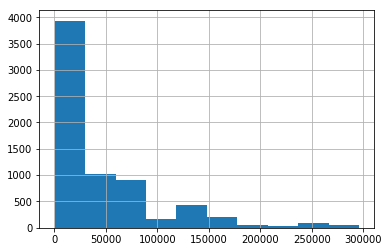

In [20]:
%matplotlib inline

df['exposure_time(s)'].hist()

## Plot: countrates

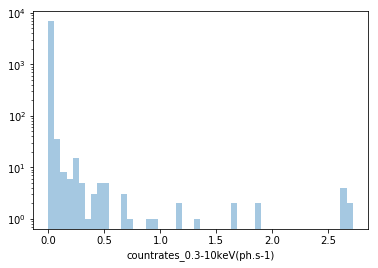

In [21]:
import seaborn as sns

ax = sns.distplot(df['countrates_0.3-10keV(ph.s-1)'], kde=False)
ax.set_yscale('log')

In [22]:
pileup = sum(df['countrates_0.3-10keV(ph.s-1)'] > 0.5)
print('Number of pile-ups: ', pileup)

Number of pile-ups:  24


Pile-up is when two photons arrive at the same CCD frame and the instrument reads that out as a single very energetic photon.

A countrate value above $0.5$ should raise an eyebrow as pile-up is probably in place.
* http://www.swift.ac.uk/analysis/xrt/pileup.php
* https://arxiv.org/abs/astro-ph/0701815

Potencially piled-up sources -- 24 in total -- are being removed from our sample.

In [23]:
idx_pu = df['countrates_0.3-10keV(ph.s-1)'] > 0.5
df = df.loc[~idx_pu]

df.describe()

,ID,RA,DEC,countrates_0.3-10keV(ph.s-1),countrates_error_0.3-10keV(ph.s-1),exposure_time(s),countrates_0.3-1keV(ph.s-1),countrates_error_0.3-1keV(ph.s-1),upper_limit_0.3-1keV(ph.s-1),countrates_1-2keV(ph.s-1),countrates_error_1-2keV(ph.s-1),upper_limit_1-2keV(ph.s-1),countrates_2-10keV(ph.s-1),countrates_error_2-10keV(ph.s-1),upper_limit_2-10keV(ph.s-1),snr
count,6863.000000,6863.000000,6863.000000,6863.000000,6863.000000,6863.000000,6863.000000,6863.000000,6863.000000,6863.000000,6863.000000,6863.000000,6863.000000,6863.000000,6863.000000,6863.000000
mean,3442.496284,116.464649,-0.200815,0.005234,0.000597,46730.938555,0.002119,-0.044570,-1006.485318,0.001881,-0.066753,-1012.745902,0.001474,-0.101662,-988.847759,6.080724
std,1987.694049,133.397136,0.788142,0.023175,0.000957,55957.695837,0.010527,0.259465,3826.611306,0.008644,0.530089,3825.776333,0.006036,0.606486,3828.910285,8.057549
min,0.000000,0.049904,-1.639452,0.000119,0.000036,387.500000,0.000000,-5.195000,-224700.000000,0.000000,-13.990000,-224700.000000,0.000000,-13.990000,-224700.000000,2.040541
25%,1721.500000,31.286925,-0.862992,0.000663,0.000140,9321.000000,0.000168,0.000059,-999.000000,0.000199,0.000066,-999.000000,0.000188,0.000062,-999.000000,3.287234
50%,3442.000000,45.260975,-0.277841,0.001435,0.000320,21131.000000,0.000428,0.000147,-999.000000,0.000464,0.000158,-999.000000,0.000409,0.000137,-999.000000,4.280000
75%,5163.500000,310.090387,0.405730,0.003022,0.000670,68066.650000,0.001084,0.000357,-999.000000,0.001101,0.000365,-999.000000,0.000926,0.000312,-999.000000,6.192391
max,6886.000000,359.917396,1.606157,0.439200,0.014000,295994.000000,0.207800,0.014000,6.601000,0.226300,0.008000,6.620000,0.143500,0.006848,6.620000,189.384615


## Plot: Sky distribution

In [24]:
from astropy import units
import astropy.coordinates as coord

ra = coord.Angle(df['RA'], units.degree)
ra = ra.wrap_at(180 * units.degree)
dec = coord.Angle(df['DEC'], units.degree)

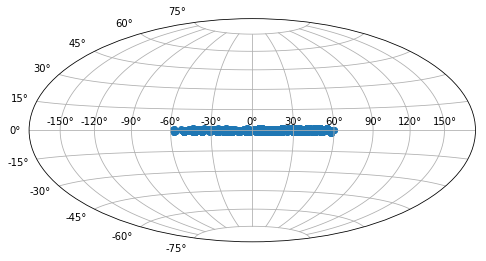

In [25]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="hammer")

ax.scatter(ra.radian, dec.radian)

# ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True)

In [26]:
from bokeh.plotting import figure, show

p = figure(x_range=(-70,70), y_range=(-2,2))
p.grid.visible = True

p.circle(x=ra.degree, y=dec.degree)

show(p)